In [1]:
# import libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# data preparation:
Data structure: from funda.nl, I scraped (using funda-scraper) houses listed for sale currently and ones being sold in 2023 (the ones available on the website record) for 8 cities (Amsterdam, Rotterdam, Almere, Utrecht, Nijmegen, Eindhoven, Masstricht, Leeuwarden). 
1. read csv files of each cities
2. combine data from current market and 2023 market to generate one file for each city
3. drop duplicated house based on house_id, for each city 
4. combine all data from 8 cities in one file

# get the file name of all csv files
file_name = os.listdir('Final_project_data/clean_data/')
for file in file_name:
    df = pd.read_csv('Final_project_data/clean_data/'+file)
    if '23' in file:
        df['on_market'] = 2023
    else:
        df['on_market'] = 2024
    df.to_csv('Final_project_data/clean_data/'+file, index=False)

# function to combine house data from 2023 and now for each city
def house_data_combine (city: str, data_folder: str)->pd.DataFrame:
    '''
    this function take the city name (str) and search in the data_folder to retrieve files containing information about house market of that city.
    Then read these csv files, and combine the dataframes to produce one final dataframe
    input:
    city: str
    data_folder: str
    output:
    pd.DataFrame
    '''
    file_name = os.listdir(data_folder)
    file_name_city = [file for file in file_name if city in file]
    total_files_city = len(file_name_city)
    n = 0
    df_final = pd.DataFrame()
    while n < total_files_city:
        df = pd.read_csv(data_folder+'{}'.format(file_name_city[n]))
        df_final = pd.concat([df_final, df], axis=0)
        n +=1
    return df_final 

In [2]:
ams = pd.read_csv('../Final_project_data/funda_clean_data/ams.csv')
utrecht = pd.read_csv('../Final_project_data/funda_clean_data/utrecht.csv')
eindhoven = pd.read_csv('../Final_project_data/funda_clean_data/eindhoven.csv')
nijmegen = pd.read_csv('../Final_project_data/funda_clean_data/nijmegen.csv')
rot = pd.read_csv('../Final_project_data/funda_clean_data/rotterdam.csv')
almere = pd.read_csv('../Final_project_data/funda_clean_data/almere.csv')
maas= pd.read_csv('../Final_project_data/funda_clean_data/maastricht.csv')
leeu= pd.read_csv('../Final_project_data/funda_clean_data/leeuwarden.csv')

In [3]:
data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]


In [4]:
# combine data from all cities
df_all = pd.concat(data, axis=0)
display(df_all.shape)
df_all.reset_index(drop=True, inplace=True)

(19843, 18)

In [5]:
df_all

,house_id,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,address,year_built,house_age,descrip,photo,on_market
0,42315941,amsterdam,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,A,1067,Lambertus Zijlplein 43,2006,18,---English translation Below--- Nu bij ons ...,https://cloud.funda.nl/valentina_media/183/273...,2024
1,42397060,amsterdam,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,B,1053,Tollensstraat 116,1979,45,"Een mooie keuken met kookeiland, moderne ba...",https://cloud.funda.nl/valentina_media/182/529...,2024
2,42398649,amsterdam,huis,Bestaande bouw,675000,5769.2,4,3,1,117,B,1034,John Kellypad 1,1995,29,Heerlijk licht en ruim familiehuis met tuin...,https://cloud.funda.nl/valentina_media/182/556...,2024
3,42343876,amsterdam,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,D,1073,Mauvestraat 45 1,1922,102,**English translation below** Dit kant-en-kl...,https://cloud.funda.nl/valentina_media/184/783...,2024
4,42747045,amsterdam,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,na,1101,SPOT Amsterdam | Toren A1 (Bouwnr. 117),2022,2,SPOT Amsterdam | Toren A1 DE BOUW IS GESTA...,https://cloud.funda.nl/valentina_media/159/938...,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19838,42294987,utrecht,appartement,Bestaande bouw,350000,4069.8,3,2,1,86,F,3523,Smaragdplein 211,1957,67,Zoek je een groot en licht 3-kamerapparteme...,https://cloud.funda.nl/valentina_media/178/576...,2023
19839,42102801,utrecht,huis,Bestaande bouw,550000,7333.3,3,2,1,75,G,3572,Bladstraat 32,1893,131,"In het mooiste stukje van de Bladstraat, in...",https://cloud.funda.nl/valentina_media/174/740...,2023
19840,42292899,utrecht,huis,Bestaande bouw,589000,4712.0,5,4,1,125,A,3541,Oswald Wenckebachhof 21,2010,14,Ruime hoekwoning met vier slaapkamers en ee...,https://cloud.funda.nl/valentina_media/178/489...,2023
19841,42208617,utrecht,appartement,Bestaande bouw,250000,3623.2,3,2,1,69,B,3562,Jaap Edendreef 122,1966,58,Zoekt u een leuk appartement met een groen ...,https://cloud.funda.nl/valentina_media/178/718...,2023


In [6]:
df_all.zip.nunique()

310

In [7]:
df_all.describe()

,house_id,price,price_m2,room,bedroom,bathroom,living_area,zip,year_built,house_age,on_market
count,1.984300e+04,1.984300e+04,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000
mean,4.238062e+07,5.106126e+05,4948.144550,4.121453,2.759663,0.983218,106.688354,3625.570982,1936.832939,87.167061,2023.411631
std,3.577450e+05,3.957792e+05,2068.576508,1.714229,1.352141,0.532552,52.107429,2445.911746,264.857380,264.857380,0.492141
min,4.130783e+07,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,1011.000000,0.000000,-8.000000,2023.000000
25%,4.219483e+07,3.250000e+05,3515.600000,3.000000,2.000000,1.000000,72.000000,1319.000000,1936.000000,17.000000,2023.000000
50%,4.229154e+07,4.250000e+05,4420.500000,4.000000,3.000000,1.000000,98.000000,3072.000000,1981.000000,43.000000,2023.000000
75%,4.236872e+07,5.750000e+05,5816.950000,5.000000,4.000000,1.000000,130.000000,5653.000000,2007.000000,88.000000,2024.000000
max,4.346994e+07,1.250000e+07,25201.600000,25.000000,20.000000,9.000000,773.000000,8941.000000,2032.000000,2024.000000,2024.000000


# data cleaning

1. drop unneccessary cols: 'house_id', 'descrip', 'photo',  'adress', 'house_age'


In [8]:
# drop columns: house_id, descrip, photo, house_age, address from the combined df

df_all_drop =  df_all[['city','house_type', 'building_type', 'price', 'price_m2', 'room', 'bedroom', 'bathroom', 'living_area', 'energy_label', 'zip', 'year_built']]

# drop columns: house_id, descrip, photo, year_built, zip, address from the combined df

df_all_drop =  df_all[['house_id','city','house_type', 'building_type', 'price', 'price_m2', 'room', 'bedroom', 'bathroom', 'living_area', 'energy_label', 'zip', 'year_built', 'photo', 'on_market']]

In [9]:
# function for distribution plots:
def dist_plot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.histplot(df[col], legend=col, ax = ax[i])
	plt.tight_layout()
	plt.show()


# function for boxplots:
def boxplot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.boxplot(df[col], ax = ax[i])
	plt.tight_layout()
	plt.show()


In [10]:
#dist_plot(df_all_drop)

In [11]:
#boxplot(df_all_drop)

In [12]:
df_all_drop.energy_label.value_counts(dropna=False)

energy_label
A      4743
C      4015
na     2914
B      2468
D      2030
>A+    1593
E      1135
F       526
G       419
Name: count, dtype: int64

In [13]:
# encode ordinal categorical energy_label: >A+ > A > B > C > D > E > F > G > na (missing info equal 0)

df_all_drop['energy_label'] = df_all_drop['energy_label'].apply(lambda x: 1 if x == 'G' else 
                                                                                        ( 2 if x == 'F' 
                                                                                        else ( 3 if x == 'E' 
                                                                                        else (4 if x == 'D' 
                                                                                        else (5 if x == 'C' 
                                                                                        else (6 if x == 'B'
                                                                                        else (7 if x == 'A'
                                                                                        else (8 if x == '>A+' 
                                                                                        else 0 ) )))))))
df_all_drop.energy_label.value_counts(dropna=False)

/var/folders/9z/v2g_zsyn4m11dzc06c73_bbm0000gn/T/ipykernel_50273/3579852995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_drop['energy_label'] = df_all_drop['energy_label'].apply(lambda x: 1 if x == 'G' else


energy_label
7    4743
5    4015
0    2914
6    2468
4    2030
8    1593
3    1135
2     526
1     419
Name: count, dtype: int64

In [14]:
#avg_price.to_csv('Final_project_data/city_price_ratio.csv')

avg_price = pd.read_csv('../Final_project_data/city_price_ratio.csv')

In [15]:
house = pd.merge(df_all_drop,avg_price[['city', 'city_price_ratio']], left_on='city', right_on='city', how='left'  )

house.to_csv('../Final_project_data/4_house_withzip.csv', index=False)

In [16]:
house

,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
0,amsterdam,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,7,1067,2006,8.00
1,amsterdam,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,6,1053,1979,8.00
2,amsterdam,huis,Bestaande bouw,675000,5769.2,4,3,1,117,6,1034,1995,8.00
3,amsterdam,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,4,1073,1922,8.00
4,amsterdam,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,0,1101,2022,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19838,utrecht,appartement,Bestaande bouw,350000,4069.8,3,2,1,86,2,3523,1957,6.83
19839,utrecht,huis,Bestaande bouw,550000,7333.3,3,2,1,75,1,3572,1893,6.83
19840,utrecht,huis,Bestaande bouw,589000,4712.0,5,4,1,125,7,3541,2010,6.83
19841,utrecht,appartement,Bestaande bouw,250000,3623.2,3,2,1,69,6,3562,1966,6.83


In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19843 entries, 0 to 19842
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              19843 non-null  object 
 1   house_type        19843 non-null  object 
 2   building_type     19843 non-null  object 
 3   price             19843 non-null  int64  
 4   price_m2          19843 non-null  float64
 5   room              19843 non-null  int64  
 6   bedroom           19843 non-null  int64  
 7   bathroom          19843 non-null  int64  
 8   living_area       19843 non-null  int64  
 9   energy_label      19843 non-null  int64  
 10  zip               19843 non-null  int64  
 11  year_built        19843 non-null  int64  
 12  city_price_ratio  19843 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 2.0+ MB


In [18]:
house.describe()

,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
count,1.984300e+04,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000,19843.000000
mean,5.106126e+05,4948.144550,4.121453,2.759663,0.983218,106.688354,4.728317,3625.570982,1936.832939,4.943204
std,3.957792e+05,2068.576508,1.714229,1.352141,0.532552,52.107429,2.511644,2445.911746,264.857380,2.206309
min,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,0.000000,1011.000000,0.000000,1.000000
25%,3.250000e+05,3515.600000,3.000000,2.000000,1.000000,72.000000,3.000000,1319.000000,1936.000000,3.710000
50%,4.250000e+05,4420.500000,4.000000,3.000000,1.000000,98.000000,5.000000,3072.000000,1981.000000,4.420000
75%,5.750000e+05,5816.950000,5.000000,4.000000,1.000000,130.000000,7.000000,5653.000000,2007.000000,6.830000
max,1.250000e+07,25201.600000,25.000000,20.000000,9.000000,773.000000,8.000000,8941.000000,2032.000000,8.000000


In [19]:
#boxplot(house)

# clean outliers

In [20]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range.

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''

    df2 = df.copy()
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) ) # ddof is a type of correction

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()

    return outliers

In [21]:
# outlier year_built
year_built_outlier = detect_outliers_zscore(house, 'year_built', 3)

In [22]:
len(year_built_outlier)

353

In [23]:
house.shape

(19843, 13)

In [24]:
19843-353

19490

In [25]:
house_ft = house.loc[[index for index in house.index.tolist() if index not in year_built_outlier],:]

In [26]:
house_ft.shape

(19490, 13)

In [27]:
# outlier price
price_outlier = detect_outliers_zscore(house_ft, 'price', 3)
len(price_outlier)


289

In [28]:
house_ft = house_ft.loc[[index for index in house_ft.index.tolist() if index not in price_outlier],:]

In [29]:
# # outlier room
room_outlier = detect_outliers_zscore(house_ft, 'room', 3)
len(room_outlier)

242

In [30]:
house_ft = house_ft.loc[[index for index in house_ft.index.tolist() if index not in room_outlier],:]

In [31]:
## outlier bathroom
bathroom_outlier = detect_outliers_zscore(house_ft, 'bathroom', 3)
len(bathroom_outlier)

87

In [32]:
house_ft = house_ft.loc[[index for index in house_ft.index.tolist() if index not in bathroom_outlier],:]

In [33]:
# # outlier bedroom
bedroom_outlier = detect_outliers_zscore(house_ft, 'bedroom', 3)
len(bedroom_outlier)

32

In [34]:
house_ft = house_ft.loc[[index for index in house_ft.index.tolist() if index not in bedroom_outlier],:]

In [35]:
display(house_ft.shape)
house_ft.describe()

(18840, 13)

,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
count,1.884000e+04,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000
mean,4.641040e+05,4831.703848,3.976911,2.686359,0.949628,101.632484,4.741189,3659.486624,1973.194480,4.892655
std,2.195871e+05,1890.725853,1.425261,1.242883,0.438306,40.390927,2.480735,2441.823083,46.958993,2.178674
min,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,0.000000,1011.000000,1182.000000,1.000000
25%,3.250000e+05,3500.000000,3.000000,2.000000,1.000000,72.000000,4.000000,1323.000000,1940.000000,3.710000
50%,4.100000e+05,4375.950000,4.000000,3.000000,1.000000,96.000000,5.000000,3076.000000,1982.000000,4.420000
75%,5.500000e+05,5681.275000,5.000000,4.000000,1.000000,126.000000,7.000000,5654.000000,2007.000000,6.830000
max,1.675000e+06,25000.000000,8.000000,6.000000,2.000000,511.000000,8.000000,8941.000000,2032.000000,8.000000


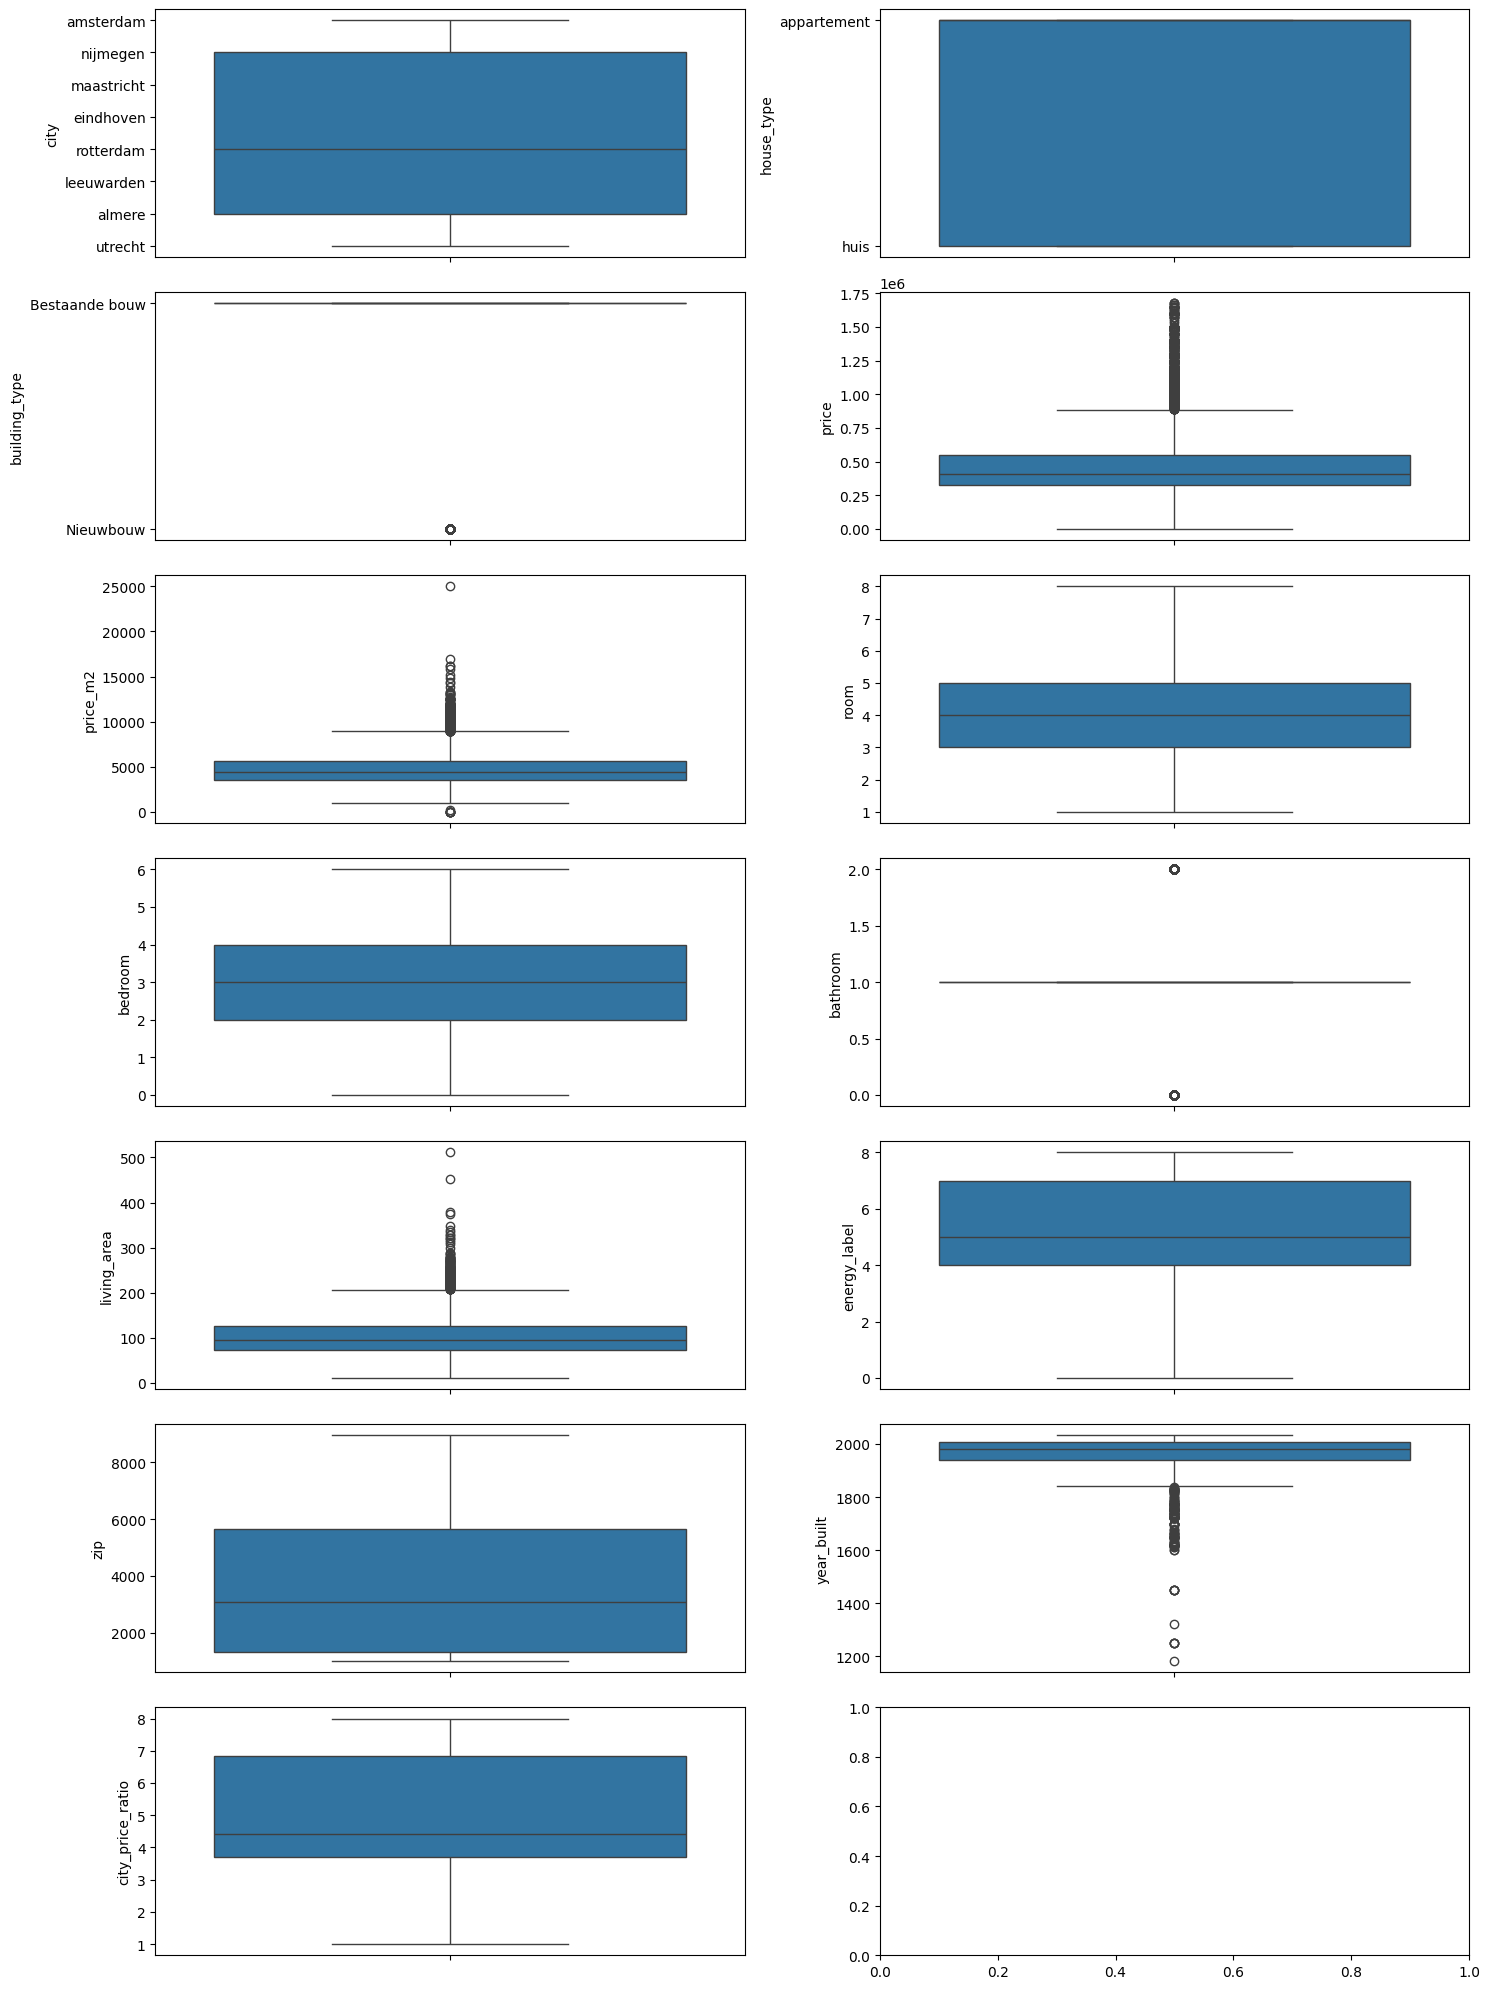

In [36]:
boxplot(house_ft)

In [37]:
house_ft.reset_index(drop=True, inplace=True)

In [38]:
#house_ft.to_csv('../Final_project_data/5_house_final.csv', index = False)

In [39]:
#house_ft.to_csv('../Final_project_data/5_house_final_all.csv', index = False)

In [40]:
house_ft.shape

(18840, 13)

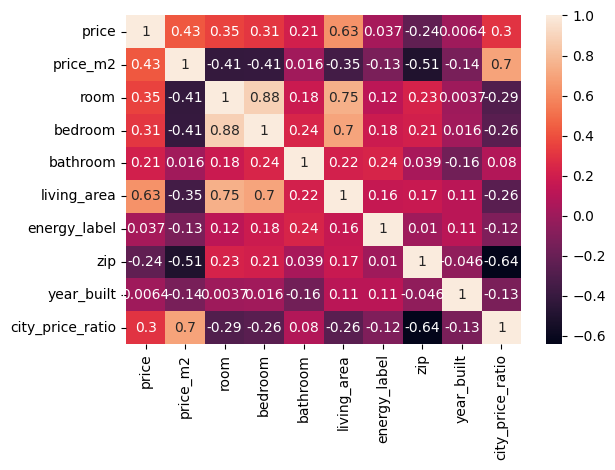

In [41]:
# check correlation
house_ft.select_dtypes(np.number).corr()
sns.heatmap(house_ft.select_dtypes(np.number).corr(), annot=True)
plt.tight_layout()
plt.show()

In [42]:
# label encoder for zip code

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(house_ft['zip'])
house_ft['zip'] = le.transform(house_ft['zip'])
house_ft.head()


,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
0,amsterdam,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,7,40,2006,8.0
1,amsterdam,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,6,26,1979,8.0
2,amsterdam,huis,Bestaande bouw,675000,5769.2,4,3,1,117,6,20,1995,8.0
3,amsterdam,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,4,45,1922,8.0
4,amsterdam,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,0,65,2022,8.0


In [43]:
house_ft.energy_label.unique()

array([7, 6, 4, 0, 3, 5, 2, 8, 1])

# saving label encoder
path = '../encoders/'
filename = 'label_encoder_for_zip.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(le, file)

In [44]:
house_ft.zip.nunique()

309

# X/y split

In [45]:
X = house_ft.drop(['price', 'price_m2'], axis = 1)
y1 = house_ft['price']
y2 = house_ft['price_m2']

# train/test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 73)

# split numerical and categorical variables

In [47]:
# split cat and num variables for train and test sets
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)


X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

# encoding categorical variables
city, house_type, and building_type

In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown = 'error')
encoder.fit(X_train_cat)



X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out(), index = X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out(), index = X_test_cat.index)

X_train_cat_encoded_df.head()

,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw
14806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# saving onehotencoder:
path = '../encoders/'
filename = 'one_hot_encoder.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(encoder, file)

# apply PowerTransformer to minimize skewness of numerical cols:
room, bedroom, bathroom, living_area, energy_label (ordinal categorical), house_age, city_price_ratio (ordinal categorical)

In [49]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_num)

X_train_num_pt = pt.transform(X_train_num)
X_test_num_pt = pt.transform(X_test_num)

X_train_num_pt_df = pd.DataFrame(X_train_num_pt, columns = X_train_num.columns, index = X_train_num.index)
X_test_num_pt_df = pd.DataFrame(X_test_num_pt, columns = X_test_num.columns, index = X_test_num.index)

X_train_num_pt_df.head()

,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
14806,0.103407,0.293479,0.079333,0.485710,0.959706,-0.658774,0.776491,-0.539277
15833,-0.634049,-0.511046,0.079333,-0.465814,0.959706,-0.732973,0.418212,-0.539277
14189,-0.634049,-0.511046,0.079333,-1.231223,0.959706,-0.454696,1.133492,-0.539277
15668,-1.486771,-1.385214,-2.058095,-1.722697,-1.772055,-0.597851,1.442322,-0.539277
4623,1.357129,1.770050,0.079333,0.552835,0.472322,1.258064,-0.327084,-0.213018


# saving transformer:
path = '../transformer/'
filename = 'power_transformer.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(pt, file)

# combine categorical and numerical again

In [50]:
X_train = pd.concat([X_train_cat_encoded_df, X_train_num_pt_df], axis = 1)
X_test = pd.concat([X_test_cat_encoded_df, X_test_num_pt_df], axis = 1)
display(X_train.head())
display(X_test.head())

,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
14806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.103407,0.293479,0.079333,0.485710,0.959706,-0.658774,0.776491,-0.539277
15833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.634049,-0.511046,0.079333,-0.465814,0.959706,-0.732973,0.418212,-0.539277
14189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.634049,-0.511046,0.079333,-1.231223,0.959706,-0.454696,1.133492,-0.539277
15668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.486771,-1.385214,-2.058095,-1.722697,-1.772055,-0.597851,1.442322,-0.539277
4623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.357129,1.770050,0.079333,0.552835,0.472322,1.258064,-0.327084,-0.213018


,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
4224,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.634049,-0.511046,0.079333,-1.012908,-1.772055,1.201930,-0.794828,-0.213018
5479,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.760357,1.049892,0.079333,0.179750,0.959706,1.313891,0.037132,-0.213018
11703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.486771,-1.385214,0.079333,-0.943444,0.010762,-0.079593,-0.302545,-0.263419
11729,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.760357,1.049892,0.079333,0.417345,0.959706,0.029592,0.009590,-0.263419
14700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.634049,-0.511046,-2.058095,-0.842055,0.959706,-0.745461,0.387323,-0.539277


# adjust scale for all cols using MinMaxScaler:

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns, index =  X_test.index)

# saving scaler:
path = '../scaler/'
filename = 'min_max_scaler.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(scaler, file)

# Model: LinearRegression

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled_df, y1_train)
display(lm.intercept_)
display(lm.coef_)


6.051868571909635e+17

array([ 9.24004549e+17,  1.98618954e+17, -6.05186857e+17, -5.59538065e+17,
        1.55113349e+17,  1.31151391e+17,  6.74768971e+17, -4.52136014e+04,
        1.21684493e+05, -8.35888781e+04, -7.59362267e+04,  9.86899124e+04,
        1.86000256e+06,  3.45118614e+04, -4.41401261e+05, -7.60260766e+04,
       -1.52919141e+18])

In [59]:
y1_train_real = y1_train.tolist()
y1_train_pred = lm.predict(X_train_scaled_df)

y1_test_real = y1_test.tolist()
y1_test_pred = lm.predict(X_test_scaled_df)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes 4 list inputs: y_real_train, y_real_test
    y_pred_train, y_predict_test, and compute and return a report 
    with error metrics calculation of your model. 
    Input:
    y_real_train: list
    y_real_test: list
    y_pred_train: list
    y_pred_test: list
    Output:
    pd.DataFrame
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared =False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test,squared =False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [61]:
error_metrics_report(y_real_train=y1_train_real, y_pred_train=y1_train_pred, y_pred_test=y1_test_pred, y_real_test=y1_test_real)

/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Train,Test
0,MAE,8.770584e+04,8.569710e+04
1,MSE,1.498965e+10,1.472613e+10
2,RMSE,1.224322e+05,1.213513e+05
3,R2,6.900000e-01,6.900000e-01


In [62]:
lm_score_test = lm.score(X_test_scaled_df, y1_test)
print("The R2 of the linnear model is {:.2f}".format(lm_score_test))

The R2 of the linnear model is 0.69


# Model: KNNRegression

In [63]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled_df, y1_train)

KNeighborsRegressor(n_neighbors=3)

In [64]:
knn_score = knn.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

The R2 of the k-NN model is 0.70


In [65]:
#knn_models = [] # knn_models = [ model_k_2, model_k_3,...]
knn_models = {} # keys = k_distance_p, value = model
weights = ["uniform","distance"] 
p_values = [1,2,3] 
scores = {}
for k in range(2,15):
    for weight in weights:
        for value in p_values:
            model = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value)
            print("Training the k-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            model.fit(X_train_scaled_df, y1_train)
            #knn_models.append(model)
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model
            scores[str(k)+"_"+weight+"_"+str(value)] = model.score(X_test_scaled_df, y1_test)
            print()

Training the k-NN model with 2 neighbours with weights uniform and p set to 1...

Training the k-NN model with 2 neighbours with weights uniform and p set to 2...

Training the k-NN model with 2 neighbours with weights uniform and p set to 3...

Training the k-NN model with 2 neighbours with weights distance and p set to 1...

Training the k-NN model with 2 neighbours with weights distance and p set to 2...

Training the k-NN model with 2 neighbours with weights distance and p set to 3...

Training the k-NN model with 3 neighbours with weights uniform and p set to 1...

Training the k-NN model with 3 neighbours with weights uniform and p set to 2...

Training the k-NN model with 3 neighbours with weights uniform and p set to 3...

Training the k-NN model with 3 neighbours with weights distance and p set to 1...

Training the k-NN model with 3 neighbours with weights distance and p set to 2...

Training the k-NN model with 3 neighbours with weights distance and p set to 3...

Training t

In [66]:
knn_models_info = {'models': list(scores.keys()), 'r2_score':[scores[key] for key in list(scores.keys())]}
knn_models_info_df = pd.DataFrame(knn_models_info)
knn_models_info_df[knn_models_info_df['r2_score'] == knn_models_info_df.r2_score.max()]

,models,r2_score
57,11_distance_1,0.739187


In [67]:
for key in list(scores.keys()):
    print(key,scores[key])

2_uniform_1 0.693970063976721
2_uniform_2 0.6884960730575902
2_uniform_3 0.6800638282600165
2_distance_1 0.6974435596657946
2_distance_2 0.6936071288740714
2_distance_3 0.6864832312646134
3_uniform_1 0.7062732944536816
3_uniform_2 0.6961214659532511
3_uniform_3 0.6943947323491293
3_distance_1 0.7169052376499725
3_distance_2 0.7086908750763892
3_distance_3 0.7061440932881791
4_uniform_1 0.7116210923808037
4_uniform_2 0.6950322067449757
4_uniform_3 0.6934777624210343
4_distance_1 0.7275388775923822
4_distance_2 0.7128906237113561
4_distance_3 0.7113384119030046
5_uniform_1 0.7122891881378206
5_uniform_2 0.6958955334437388
5_uniform_3 0.688879399732423
5_distance_1 0.7312103372589182
5_distance_2 0.7180776879481856
5_distance_3 0.7115872707826609
6_uniform_1 0.7109001873794641
6_uniform_2 0.6939304033063132
6_uniform_3 0.6848619102316453
6_distance_1 0.7339920470600914
6_distance_2 0.7200754488207297
6_distance_3 0.7122064411811122
7_uniform_1 0.7142144397214663
7_uniform_2 0.692173764914

In [68]:
# update KNN model:
knn_2 = KNeighborsRegressor(n_neighbors=11, weights='distance', p =1)
knn_2.fit(X_train_scaled_df, y1_train)
knn_score_1 = knn_2.score(X_train_scaled_df, y1_train)
print("The R2 of the k-NN model for train set is {:.2f}".format(knn_score_1))
knn_score_2 = knn_2.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model for test set is {:.2f}".format(knn_score_2))

The R2 of the k-NN model for train set is 1.00
The R2 of the k-NN model for test set is 0.74


# Model : random forest

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [70]:
# hyperparameters tuning
max_depth_choices = [5,7] # A list of the possible values of max_depth to try
criterion_choices = ['squared_error'] # A list of the possible values optimization metrics
min_samples_split_choices = [10,15,20] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [5,10] 
max_features = ['sqrt']
n_estimators = [ 400,300, 200]

param_grids = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features,
        "n_estimators": n_estimators}

rfr = RandomForestRegressor(random_state=73)

grid_search = GridSearchCV(estimator= rfr, param_grid = param_grids, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y1_train)
grid_search.best_params_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 4/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 1/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 2/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 3/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400
[CV 4/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=(train=0.697, test=0.685) total time=   6.7s
[CV 2/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=(train=0.701, test=0.693) total time=   6.6s
[CV 1/5; 1/36]

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 400}

In [71]:
rfr_best = grid_search.best_estimator_
rfr_best

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=73)

In [72]:
rfr_best.fit(X_train, y1_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=73)

In [73]:
print('r2 score of train set:', r2_score(y1_train, rfr_best.predict(X_train)))
print('r2 score of test set:', r2_score(y1_test, rfr_best.predict(X_test)))

r2 score of train set: 0.7839539627634762
r2 score of test set: 0.7594672045122752


In [74]:
rfr_best.feature_importances_

array([0.04317349, 0.0007699 , 0.01175612, 0.0008513 , 0.0005939 ,
       0.00323807, 0.01299966, 0.01813292, 0.01005673, 0.07508583,
       0.04764595, 0.07591127, 0.42903064, 0.01381609, 0.11657917,
       0.06969128, 0.07066769])

In [75]:
rfr_best.feature_names_in_

array(['city_amsterdam', 'city_eindhoven', 'city_leeuwarden',
       'city_maastricht', 'city_nijmegen', 'city_rotterdam',
       'city_utrecht', 'house_type_huis', 'building_type_Nieuwbouw',
       'room', 'bedroom', 'bathroom', 'living_area', 'energy_label',
       'zip', 'year_built', 'city_price_ratio'], dtype=object)

# Model: XGBoost

In [51]:
from xgboost import XGBRegressor

In [52]:

from sklearn.metrics import mean_squared_error

# Create XGBoost regressor
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg = XGBRegressor(objective ='reg:squarederror',random_state=73)
# Train the model
xg_reg.fit(X_train_scaled_df, y1_train)

# Predictions
y1_test_pred = xg_reg.predict(X_test_scaled_df)

# Calculate Mean Squared Error
mse = mean_squared_error(y1_test, y1_test_pred)
print(f"Mean Squared Error: {mse}")
r2_score_train = r2_score(y1_train, xg_reg.predict(X_train_scaled_df))
display('train r2_score',r2_score_train )
r2_score_test = r2_score(y1_test, y1_test_pred)
display('test r2_score',r2_score_test )


NameError: name 'X_train_scaled_df' is not defined

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [56]:
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score
XGB = XGBRegressor(random_state=73)
xg_param_grid = {
              'n_estimators' :[600],
              'learning_rate': [0.04, 0.06, 0.08],    
              'max_depth': [5,7],
              'min_child_weight':[0.2],              
              'gamma': [0],                
              'subsample':[0.6],
              'alpha': [20,30],
              'colsample_bytree':[0.6]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y1_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)
#y_hat_xgb = np.expm1(gsXGB.predict(X_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'alpha': 20, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 600, 'subsample': 0.6}


In [86]:
X_train

,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,zip,year_built,city_price_ratio
14806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.103407,0.293479,0.079333,0.485710,0.959706,-0.658774,0.776491,-0.539277
15833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.634049,-0.511046,0.079333,-0.465814,0.959706,-0.732973,0.418212,-0.539277
14189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.634049,-0.511046,0.079333,-1.231223,0.959706,-0.454696,1.133492,-0.539277
15668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.486771,-1.385214,-2.058095,-1.722697,-1.772055,-0.597851,1.442322,-0.539277
4623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.357129,1.770050,0.079333,0.552835,0.472322,1.258064,-0.327084,-0.213018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.760357,1.049892,0.079333,0.324165,-0.422367,0.711020,-1.025024,-0.121511
13704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.906798,1.770050,0.079333,2.552195,0.959706,-0.795783,0.880341,-0.539277
16144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.760357,1.049892,0.079333,1.859676,1.470854,-0.454696,1.059581,-0.539277
8586,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.760357,1.049892,0.079333,0.704927,0.010762,0.906653,-0.150634,-0.121511


In [80]:
XGB_best

XGBRegressor(alpha=20, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, ...)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'alpha': 20, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.06, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 400, 'subsample': 0.8}, r2: 0.97 vs0.87
{'alpha': 10, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 600, 'subsample': 0.6}, r2: 0.96 vs. 0.87
{'alpha': 20, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 0.2, 'n_estimators': 600, 'subsample': 0.6}, r2: 0.96 vs. 0.87

In [102]:
import pickle
# saving XGB_best model:
path = '/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/models/'
filename = 'XGB_best_all_final.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(XGB_best, file)


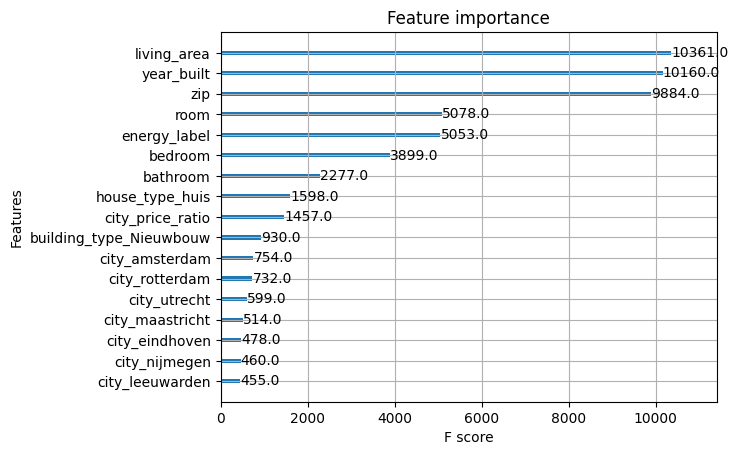

In [82]:
from xgboost import plot_importance
plot_importance(XGB_best)
plt.show()

In [83]:
r2_train = performance_metric(y1_train, XGB_best.predict(X_train)).round(2)
r2_test = performance_metric(y1_test, XGB_best.predict(X_test)).round(2)
print ("R2 train: ", r2_train)
print ("R2 test: ", r2_test)


R2 train:  0.96
R2 test:  0.87


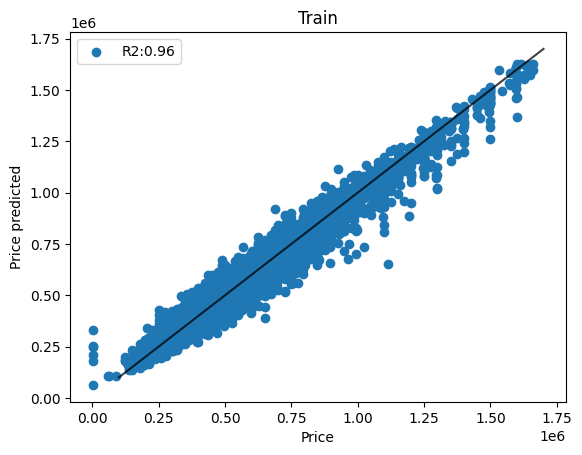

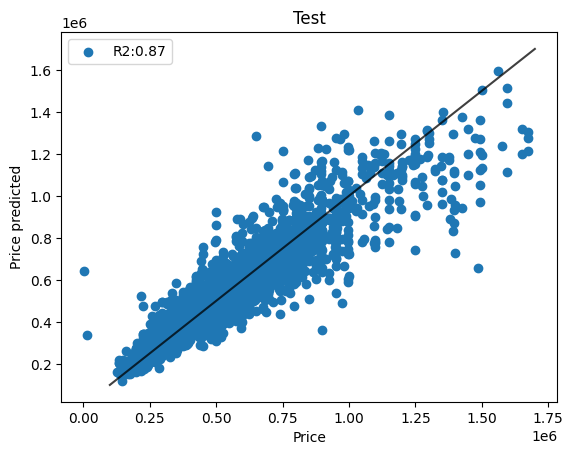

In [84]:
plt.scatter((y1_train), (gsXGB.predict(X_train)),label='R2:'+str(round(r2_train,4)))
plt.title('Train')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.plot([100000,1700000], [100000,1700000], 'k-', alpha=0.75)
plt.legend()
plt.show()
plt.scatter((y1_test),(gsXGB.predict(X_test)),label='R2:'+str(round(r2_test,4)))
plt.plot([100000,1700000], [100000,1700000], 'k-', alpha=0.75)
plt.title('Test')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.legend()
plt.show()